In [1]:
#importing necessary libraries
import hashlib, random, numpy as np, matplotlib.pyplot as plt


In [2]:
# opening the word.txt given in assignment 1
with open("words.txt") as f:
    words = [w.strip() for w in f if w.strip()]
# print("Total words:", len(words))
# print("Example:", words[:10])


In [3]:
#Q1 PART A
class UniversalHashTable:
    def __init__(self, m, p=524287, a=None):
        self.m = m
        self.p = p
        self.a = a if a else random.randint(1, p-1)
        self.table = [[] for _ in range(m)]

    def _to_int(self, s):
        return int.from_bytes(s.encode(), "little")

    def hash(self, s):
        return ((self.a * self._to_int(s)) % self.p) % self.m

    def insert(self, s):
        self.table[self.hash(s)].append(s)

    def chain_lengths(self):
        return [len(chain) for chain in self.table]

# demo
ht = UniversalHashTable(1000)
for w in words[:500]:
    ht.insert(w)
print("Example chain lengths:", ht.chain_lengths()[:20])


Example chain lengths: [1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3]


In [4]:
#Q1 PART B
def md5_last4_int(word):
    h = hashlib.md5(word.encode()).hexdigest()
    return int(h[-4:], 16)

md5_map = {w: md5_last4_int(w) for w in words}
for i, (w, val) in enumerate(md5_map.items()):
    if i < 10: print(w, "→", val)


&c → 24484
'd → 349
'em → 14811
'll → 30807
'm → 5815
'mid → 64890
'midst → 32364
'mongst → 26453
'prentice → 60118
're → 3853


Universal: [np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2)]
Random: [np.int64(8), np.int64(9), np.int64(10), np.int64(8), np.int64(8)]


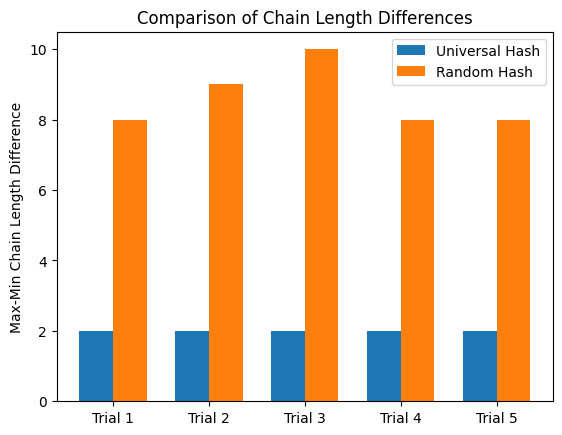

In [4]:
#Q1 PART C
import numpy as np
import random
import matplotlib.pyplot as plt

def experiment_chain_lengths(m=500000, trials=5):
    uni_diffs, rand_diffs = [], []
    p = 524287
    for _ in range(trials):
        # universal hash
        a = random.randint(1, p-1)
        xs = np.arange(1, m+1)
        idxs = ((a*xs) % p) % m
        counts = np.bincount(idxs, minlength=m)
        uni_diffs.append(counts.max() - counts.min())

        # random hash
        idxs = np.random.randint(0, m, size=m)
        counts = np.bincount(idxs, minlength=m)
        rand_diffs.append(counts.max() - counts.min())

    return uni_diffs, rand_diffs

# Run experiment
uni_diffs, rand_diffs = experiment_chain_lengths(500000)

print("Universal:", uni_diffs)
print("Random:", rand_diffs)

# ---- Plotting part ----
labels = [f"Trial {i+1}" for i in range(len(uni_diffs))]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, uni_diffs, width, label='Universal Hash')
rects2 = ax.bar(x + width/2, rand_diffs, width, label='Random Hash')

ax.set_ylabel('Max-Min Chain Length Difference')
ax.set_title('Comparison of Chain Length Differences')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_18156\357770663.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fm_results[m] for m in fm_results], labels=[str(m) for m in fm_results])


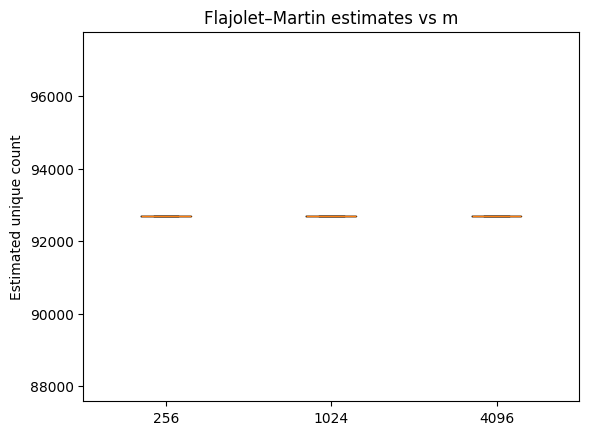

Actual unique IDs: 65247
m=256: mean estimate=92681.9, samples=[92681.90002368316, 92681.90002368316, 92681.90002368316, 92681.90002368316, 92681.90002368316]
m=1024: mean estimate=92681.9, samples=[92681.90002368316, 92681.90002368316, 92681.90002368316, 92681.90002368316, 92681.90002368316]
m=4096: mean estimate=92681.9, samples=[92681.90002368316, 92681.90002368316, 92681.90002368316, 92681.90002368316, 92681.90002368316]


In [9]:
#Q1 PART D
def trailing_zeros(x):
    if x == 0: return 16
    return (x & -x).bit_length()-1

def flajolet_martin(ids, m_values=[256,1024,4096], trials=5):
    p=524287; results={}
    for m in m_values:
        ests=[]
        for _ in range(trials):
            a=random.randint(1,p-1)
            zmax=0
            for idv in ids:
                h=((a*idv)%p)%m
                z=trailing_zeros(h)
                zmax=max(zmax,z)
            ests.append(2**(zmax+0.5))
        results[m]=ests
    return results

ids = list(md5_map.values())
fm_results = flajolet_martin(ids)

# plot boxplot
plt.boxplot([fm_results[m] for m in fm_results], labels=[str(m) for m in fm_results])
plt.title("Flajolet–Martin estimates vs m")
plt.ylabel("Estimated unique count")
plt.show()

print("Actual unique IDs:", len(set(ids)))
for m, ests in fm_results.items():
    print(f"m={m}: mean estimate={np.mean(ests):.1f}, samples={ests}")


C:\Users\lenovo\AppData\Local\Temp\ipykernel_18156\357770663.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fm_results[m] for m in fm_results], labels=[str(m) for m in fm_results])


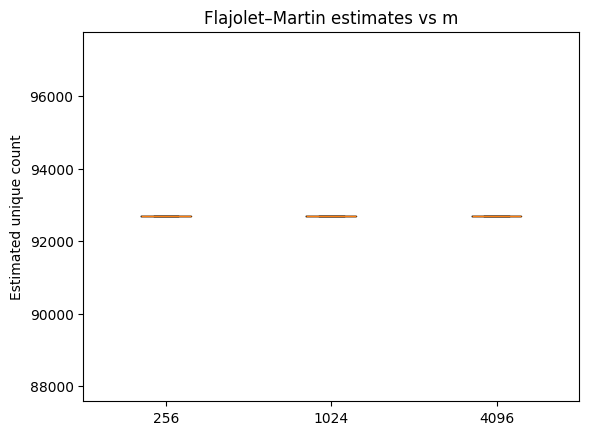

Actual unique IDs: 65247
m=256: mean estimate=92681.9, samples=[92681.90002368316, 92681.90002368316, 92681.90002368316, 92681.90002368316, 92681.90002368316]
m=1024: mean estimate=92681.9, samples=[92681.90002368316, 92681.90002368316, 92681.90002368316, 92681.90002368316, 92681.90002368316]
m=4096: mean estimate=92681.9, samples=[92681.90002368316, 92681.90002368316, 92681.90002368316, 92681.90002368316, 92681.90002368316]


In [9]:
def trailing_zeros(x):
    if x == 0: return 16
    return (x & -x).bit_length()-1

def flajolet_martin(ids, m_values=[256,1024,4096], trials=5):
    p=524287; results={}
    for m in m_values:
        ests=[]
        for _ in range(trials):
            a=random.randint(1,p-1)
            zmax=0
            for idv in ids:
                h=((a*idv)%p)%m
                z=trailing_zeros(h)
                zmax=max(zmax,z)
            ests.append(2**(zmax+0.5))
        results[m]=ests
    return results

ids = list(md5_map.values())
fm_results = flajolet_martin(ids)

# plot boxplot
plt.boxplot([fm_results[m] for m in fm_results], labels=[str(m) for m in fm_results])
plt.title("Flajolet–Martin estimates vs m")
plt.ylabel("Estimated unique count")
plt.show()

print("Actual unique IDs:", len(set(ids)))
for m, ests in fm_results.items():
    print(f"m={m}: mean estimate={np.mean(ests):.1f}, samples={ests}")


In [10]:
import os
os.makedirs("q1_outputs", exist_ok=True)

plt.savefig("q1_outputs/fm_boxplot.png")
np.savetxt("q1_outputs/md5_map_sample.txt",
           [f"{w}\t{v}" for w,v in list(md5_map.items())[:500]],
           fmt="%s")

print("Saved results in q1_outputs/")


Saved results in q1_outputs/


<Figure size 640x480 with 0 Axes>